In [3]:
# ploting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# deplyment libraries
import pickle
# import PreProcessing functions
import sys 
import os
sys.path.append(os.path.abspath("C:\\Users\\koriv\\Desktop\\MachineLearning_DataScience\\Hands_On_Machine_Learning\\my_env_codebasics\\My_CODE\\ML-projects\\NLP-Classification\\nlp_project\\preProcessing"))
from fake_News_Classifier_preProcessing import Transformations

# Importing required framework libraries
import pandas as pd
import numpy as np
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Import Model libraries
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
# for scoring
from sklearn.metrics import fbeta_score, make_scorer

#Evaluation libraries
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, confusion_matrix, classification_report
from sklearn.metrics import recall_score,precision_score,f1_score, accuracy_score, balanced_accuracy_score
from sklearn.metrics import f1_score, fbeta_score, classification_report, make_scorer
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve

# Import UnProcessed features

In [4]:
#Import training features
import pathlib
path_to_read_model = '..\\probleam_study' #Path of current working Directory
with open(path_to_read_model + '\\trainFeatures_list.pkl', 'rb') as f:
    X, y = pickle.load(f)

## Verify the match of the Processed Data column Names

In [5]:
#Import testing features
import pathlib
path_to_read_model = '..\\encoding_scaling_imputation_modelling' #Path of current working Directory
with open(path_to_read_model + '\\feature_ColumnNames.pkl', 'rb') as f:
    feature_ColumnNames = pickle.load(f)

In [6]:
X.columns == feature_ColumnNames

array([ True,  True,  True,  True])

# load Data PreProcessing

In [7]:
# Define a function to apply the imported functions
def preProcessing(featureDF, targetDF, function_list):
    for function in function_list:
        featureDF, targetDF = function(featureDF, targetDF)
    return featureDF, targetDF

X, y = preProcessing(X, y, [Transformations])

>>feature shape before cleaning:  (5824, 4)
>>target shape before cleaning:  (5824,)
>>feature shape after cleaning:  (5641, 1)
>>target shape after cleaning:  (5641,)
>>feature shape after preProcessing:  (5641, 1)
>>target shape after preProcessing:  (5641,)


# Encoding and Modeling

In [8]:
#Import Modelled features
import pathlib
path_to_read_model = '..\\encoding_scaling_imputation_modelling' #Path of current working Directory
with open(path_to_read_model + '\\estimators.pkl', 'rb') as f:
    best_algos, = pickle.load(f)

In [9]:
best_algos

{'BernoulliNB_CountVectorizer': {'best_estimator': Pipeline(steps=[('textVec', CountVectorizer(ngram_range=(1, 2))),
                  ('scaler', None),
                  ('model', BernoulliNB(alpha=2, fit_prior=False))]),
  'best_mean_test_score': 0.9170658580863235},
 'MultinomialNB_CountVectorizer': {'best_estimator': Pipeline(steps=[('textVec',
                   CountVectorizer(max_features=15000, ngram_range=(1, 3))),
                  ('scaler', None),
                  ('model', MultinomialNB(alpha=1, fit_prior=False))]),
  'best_mean_test_score': 0.8861378107583524},
 'BernoulliNB_TfidfVectorizer': {'best_estimator': Pipeline(steps=[('textVec', TfidfVectorizer(ngram_range=(1, 2))),
                  ('scaler', None),
                  ('model', BernoulliNB(alpha=2, fit_prior=False))]),
  'best_mean_test_score': 0.9170658580863235},
 'MultinomialNB_TfidfVectorizer': {'best_estimator': Pipeline(steps=[('textVec',
                   TfidfVectorizer(max_features=15000, ngram_range

## BernoulliNB_TfidfVectorizer

In [10]:
piep_BNP = best_algos['BernoulliNB_TfidfVectorizer']['best_estimator']

In [11]:
#Predictions for Test Data
y_pred = piep_BNP.predict(X.title)

In [12]:
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

## confusion Matrix

In [13]:
confusion_matrix(y, y_pred)

array([[2921,   56],
       [  15, 2649]], dtype=int64)

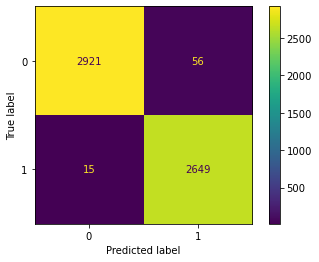

In [14]:
plot_confusion_matrix(piep_BNP, X.title, y)

## Precision score  
high Precision implies low False positives  

In [15]:
print("individual precision score: ",precision_score(y,y_pred,average=None))
print("weighted average precision score: ",precision_score(y,y_pred,average='weighted'))
print("normal/binary average precision score: ",precision_score(y,y_pred,average='macro'))

individual precision score:  [0.99489101 0.9792976 ]
weighted average precision score:  0.9875269154150695
normal/binary average precision score:  0.9870943026084504


## Recall score  
high Precision implies low False negatives  

In [16]:
print("individual recall score: ",recall_score(y,y_pred,average=None))
print("weighted average recall score: ",recall_score(y,y_pred,average='weighted'))
print("normal/binary recall precision score: ",recall_score(y,y_pred,average='macro'))

individual recall score:  [0.98118912 0.99436937]
weighted average recall score:  0.9874135791526325
normal/binary recall precision score:  0.9877792429648324


## Accuracy and balanced Accuracy

In [17]:
print("accuracy: ",accuracy_score(y,y_pred))
print("Balanced accuracy: ",balanced_accuracy_score(y,y_pred))

accuracy:  0.9874135791526325
Balanced accuracy:  0.9877792429648324


## F1 score and F-Beta score

In [18]:
print("normal F1 score: ",f1_score(y, y_pred, average='macro'))
print("normal F-beta score at beta 0.75: ",fbeta_score(y,y_pred, beta=0.75, average='macro'))
print("weighted F1 score: ",f1_score(y, y_pred, average='weighted'))
print("weighted F-beta score at beta 0.75: ",fbeta_score(y,y_pred, beta=0.75, average='weighted'))

normal F1 score:  0.9873842473486464
normal F-beta score at beta 0.75:  0.9872924876913527
weighted F1 score:  0.9874180004907334
weighted F-beta score at beta 0.75:  0.9874379722122364


## classification_report

In [19]:
print(classification_report(y, y_pred, target_names=['News', 'Fake_news'], digits=2, 
                      output_dict=False, zero_division='warn'))

              precision    recall  f1-score   support

        News       0.99      0.98      0.99      2977
   Fake_news       0.98      0.99      0.99      2664

    accuracy                           0.99      5641
   macro avg       0.99      0.99      0.99      5641
weighted avg       0.99      0.99      0.99      5641



In [20]:
print(classification_report(y, y_pred, labels=[0,1,2], digits=2, 
                      output_dict=False, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2977
           1       0.98      0.99      0.99      2664
           2       0.00      0.00      0.00         0

   micro avg       0.99      0.99      0.99      5641
   macro avg       0.66      0.66      0.66      5641
weighted avg       0.99      0.99      0.99      5641



C:\Users\koriv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\koriv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\koriv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\koriv\anaconda3\lib\site-packages\sklearn\metrics\_cla

# Precision_Recall_curve  
Precision  
The precision of a model is defined as:  
  
$$
\textbf{Precision} = \frac{\textbf{True Positives}}{\textbf{True Positives} + \textbf{False Positives}} = \frac{\textbf{True Positives}}{\textbf{Predicted True}}
$$  
and captures the accuracy of the model when it is positive. Higher precision models are often more likely to predict that true   things are negative (higher false negative rate).  
  
Recall  
The recall of a model is defined as:  
  
$$
\textbf{Recall} = \frac{\textbf{True Positives}}{\textbf{True Positives} + \textbf{False Negatives}} = \frac{\textbf{True Positives}}{\textbf{Actually True}}
$$  
and captures the ability of the model to predict true on all the true examples. Higher recall runs the risk of predicting true   on false examples.  

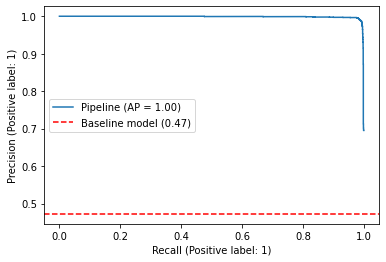

In [21]:
plot_precision_recall_curve(piep_BNP, X.title, y)
baseline = y.sum() / len(y) #fraction of positive samples in the Test data
plt.axhline(baseline, ls='--', color='r', label=f'Baseline model ({round(baseline,2)})')
plt.legend(loc='best')
#AP in the plot is trapezoidal area under the operating points.
#baseline: if you've got k training samples for category C in your training set of size n, the baseline classifier would categorise an input to C with probability k/n. A basic model must do better then the baseline.

# AUC and ROC  
ROC is the receiver operating characteristic AUROC is the area under the ROC curve  
The ROC curve summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the False Positive Rate (FPR) on the X-axis and the True Positive Rate (TPR) on the Y-axis.  
  
$\text{TPR (Sensitivity)} = \frac{TP}{TP + FN}$  
   
$\text{FPR (1 - Specificity)} = \frac{FP}{TN + FP}$  

In [22]:
# AUC
model_auc = roc_auc_score(y, y_pred) #area under the curve => AUC
# Base line is 50:50 chance at random, hence it would be y=x => base_auc = 0.5
base_pred = [0 for _ in range(len(y))] #predict all to be zero
base_auc = roc_auc_score(y, base_pred)

In [23]:
# Calculate ROC curve
model_FPR, model_TPR, model_threshold = roc_curve(y, y_pred)
base_FPR, base_TPR, base_threshold = roc_curve(y, base_pred)

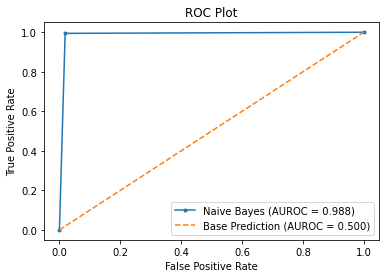

In [24]:
# Plot ROC Curve
plt.plot(model_FPR, model_TPR, marker='.', label='Naive Bayes (AUROC = %0.3f)' % model_auc)
plt.plot(base_FPR, base_TPR, linestyle='--', label='Base Prediction (AUROC = %0.3f)' % base_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# learning Curve

## learning curve for accuracy

In [25]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = piep_BNP,
X = X.title,
y = y, cv = 5,
scoring = 'accuracy') #optionally can pass train_sizes = train_sizes for custom training sizes

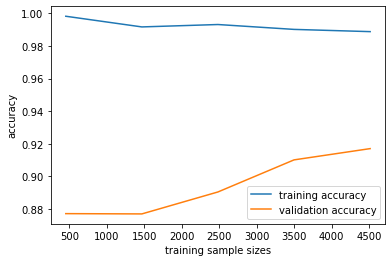

In [26]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='training accuracy')
plt.plot(train_sizes, validation_scores.mean(axis=1),  label='validation accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('accuracy')
plt.legend()

# learning curve for balanced accuracy

In [27]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = piep_BNP,
X = X.title,
y = y, cv = 5,
scoring = 'balanced_accuracy') #optionally can pass train_sizes = train_sizes for custom training sizes

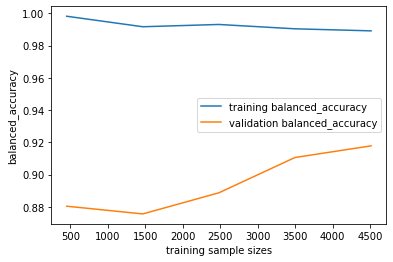

In [28]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='training balanced_accuracy')
plt.plot(train_sizes, validation_scores.mean(axis=1),  label='validation balanced_accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('balanced_accuracy')
plt.legend()

## learning curve for f1_score

In [29]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = piep_BNP,
X = X.title,
y = y, cv = 5,
scoring=make_scorer(f1_score, average='macro', greater_is_better=True)) #optionally can pass train_sizes = train_sizes for custom training sizes

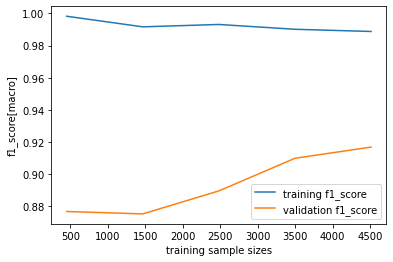

In [30]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='training f1_score')
plt.plot(train_sizes, validation_scores.mean(axis=1),  label='validation f1_score')
plt.xlabel('training sample sizes')
plt.ylabel('f1_score[macro]')
plt.legend()

# learning curve for fbeta_score

In [31]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = piep_BNP,
X = X.title,
y = y, cv = 5,
scoring=make_scorer(fbeta_score, beta=0.75, average='macro', greater_is_better=True)) #optionally can pass train_sizes = train_sizes for custom training sizes

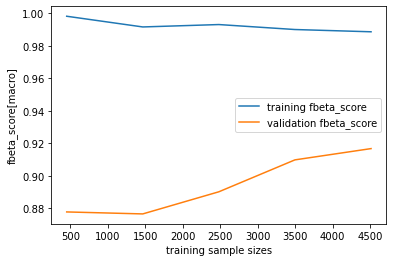

In [32]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='training fbeta_score')
plt.plot(train_sizes, validation_scores.mean(axis=1),  label='validation fbeta_score')
plt.xlabel('training sample sizes')
plt.ylabel('fbeta_score[macro]')
plt.legend()